# 04 - Grid Search

In Exercise 03, we calculated the cost associated with values of `theta0` and `theta1`. We can now look at a range of parameter values to see the impact on the cost: this is a grid search of the parameters $\theta_0$ and $\theta_1$.

## Setup

First, here are some imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/ciqual_small.csv")

Get the following functions from previous exercises:

In [3]:
 def h(x, theta0, theta1):
    # TODO: Take h() from Exercise 02.
    pass

def L(x, y, theta0, theta1):
    # TODO: Take L() from Exercise 03.
    pass

def plot_reg_line(x, y, theta0, theta1):
    # TODO: Take plot_reg_line() from Exercise 03.
    pass

In [4]:
def h(x, theta0, theta1):
    y_pred = theta0 + theta1 * x
    return y_pred

def L(x, y, theta0, theta1):
    y_hat = h(x, theta0, theta1)
    m = x.shape[0]
    return (1 / (2 * m)) * np.sum((y_hat - y) ** 2)

def plot_reg_line(x, y, theta0, theta1):
    x_line = np.arange(x.min() - x.min() / 10,
                       x.max() + x.max() / 10,
                      0.1)
    y_line = theta0 + theta1 * x_line

    sns.scatterplot(x, y)
    plt.plot(x_line, y_line)

To do the grid search, you will need to:

- 1. Use your cost function `L(x, y, theta0, theta1)` to calculate the cost on the whole dataset for different values of $\theta_0$ and $\theta_1$.

Use the following grid of parameters:

In [5]:
theta0_grid = np.arange(-500, 500, 50)
theta1_grid = np.arange(-500, 500, 50)

Your function must take `x`, `y`, `theta0_grid`, and `theta1_grid` as input and return a two-dimensional Numpy array containing the cost values for each combination of parameter $\theta_0$ and $\theta_1$. You can store the returned grid in a variable called `cost_all`.

- 2. Store these value in a 2D Numpy array

<details>
<summary>hint</summary>
You can create an array filled with 0. For instance,

```python
np.zeros((2, 2))
```

creates an array of shape $2 \times 2$. You can then fill it with the parameter values.
</details>

In [6]:
# Your code here
def grid_search(x, y, theta0_grid, theta1_grid):
    # TODO: This function should return an array filled with cost values for each parameter combination.
    pass

In [7]:
def grid_search(x, y, theta0_grid, theta1_grid):
    cost_all = np.zeros((theta0_grid.shape[0], theta1_grid.shape[0]))

    for i in range(theta0_grid.shape[0]):
        for j in range(theta1_grid.shape[0]):
            cost = L(x, y, theta0=theta0_grid[i], theta1=theta1_grid[j])
            cost_all[i, j] = cost
    return cost_all

In [8]:
cost_all = grid_search(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'],
                       theta0_grid=theta0_grid, theta1_grid=theta1_grid)

You can check that your `grid_search()` function is correct with the following tests:

In [9]:
cost_all = grid_search(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'],
                       theta0_grid=theta0_grid, theta1_grid=theta1_grid)
cost_all[12, 4]
# Should return 259674.29245283018

259674.29245283018

In [10]:
cost_all[7, 18]
# Should return 101248.79245283018

101248.79245283018

- 3. Plot this matrix using a heatmap

<details>
<summary>hint</summary>
https://seaborn.pydata.org/generated/seaborn.heatmap.html
</details>


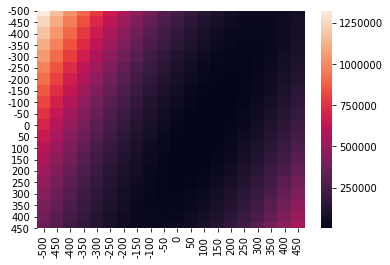

In [11]:
sns.heatmap(cost_all,
           xticklabels = theta1_grid,
           yticklabels = theta0_grid)

You can now try to extract the parameters associated with the lowest cost from the array `cost_all`.

- create the variable `best_params` containing a tuple with the indexes corresponding to the best parameter values.
- create the variables `best_theta0_norm` and `best_theta1_norm` containing the values of `theta0` and `theta1` corresponding to the lower cost
- plot the regression line along with the normalized data

In [12]:
# Your code here
# TODO: create the variable `best_params`, `best_theta0` and `best_theta1`.

In [13]:
best_params = np.unravel_index(cost_all.argmin(), cost_all.shape)

best_theta0 = theta0_grid[best_params[0]]
best_theta1 = theta1_grid[best_params[1]]

Test your results with the following cell:

In [14]:
print(best_theta0, best_theta1)
# Should return 0 100

0 100


This means that the intercept is 0 and the slope is 100.

Finally, you can use your function `plot_reg_line(x, y, theta0, theta1)` from Exercise 03 to plot the regression line and see if it fits our data well.

In [15]:
# Your code here


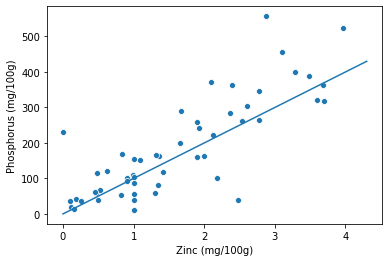

In [16]:
plot_reg_line(data['Zinc (mg/100g)'],
              data['Phosphorus (mg/100g)'],
              theta0=best_theta0,
              theta1=best_theta1)


We might note that the accuracy depends on the resolution of our grids. Here we used a step of 50 for speed, which is rough.

## Normalization

Since the parameters don't have the same scale, the "good" parameter values (the values that are associated with a low cost) are more spread on one dimension in comparison to the other. It makes it hard to visualize. It is also better for gradient descent to have features on the same scale.

In our case, we want to normalize our single feature (amount of `zinc`) and the dependent variable in order to insure that the best parameters will be in the same range which will facilitate the search.

You can try to normalize the feature (amount of `zinc`) and the dependent variable (amount of `phosphorus`). To do so, you will create a normalization function. The goal of normalization is to end up with a variable with a mean of 0 and a standard deviation of 1.

In [17]:
# Your code here
def normalize(X):
    # TODO: This function should return the normalized array X (mean: 0 and std: 1).
    # X should have dimension 1: we'll use this function to normalize one column at a time.
    pass


In [18]:
def normalize(X):
    return (X - X.mean()) / X.std()

We will copy our dataset to be sure to keep it untouched and normalize the variables using our function.

In [19]:
data_norm = data.copy()

To check that your function is correct, run the following test:

In [20]:
normalize(data_norm['Zinc (mg/100g)']).head()
# Should return the following values:
# 0    -1.033903
# 1    -1.299774
# 2    -0.905552
# 3    -1.235598
# 4    -1.382285

0   -1.033903
1   -1.299774
2   -0.905552
3   -1.235598
4   -1.382285
Name: Zinc (mg/100g), dtype: float64

You can also check the mean and the standard deviation of the variable after normalization.

When your `normalize()` function is correct:

- 1. Use it to normalize the variables `zinc` and `phosphorus`.
- 2. Visualize the scatter plot of the normalized data.
- 3. Calculate the cost for every combination of parameters with the function `grid_search()` that you coded above. Store the grid in a variable called `cost_all_norm`.
- 4. Visualize the new heatmap of normalized data.

In [21]:
# Your code here


1.

In [22]:
data_norm['Zinc (mg/100g)'] = normalize(data_norm['Zinc (mg/100g)'])
data_norm['Phosphorus (mg/100g)'] = normalize(data_norm['Phosphorus (mg/100g)'])

2.

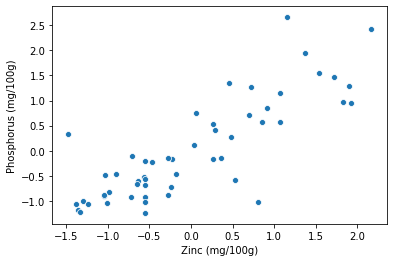

In [23]:
sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data_norm)

We can see that the normalized data are centered around 0.

3.

In [24]:
cost_all_norm = grid_search(x=data_norm['Zinc (mg/100g)'], y=data_norm['Phosphorus (mg/100g)'],
                            theta0_grid=theta0_grid, theta1_grid=theta1_grid)


4.

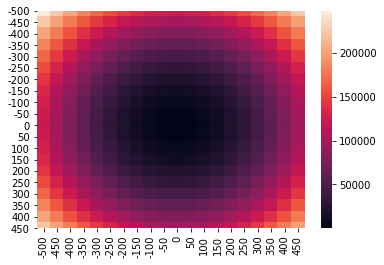

In [25]:
sns.heatmap(cost_all_norm,
           xticklabels = theta1_grid,
           yticklabels = theta0_grid)

Let's zoom in a bit. You can repeat the same steps using a new range for our grid:

In [26]:
theta0_grid_zoom = np.arange(-2, 2, 0.2)
theta1_grid_zoom = np.arange(-2, 2, 0.2)

In [27]:
# Your code here


In [28]:
cost_all_norm = grid_search(x=data_norm['Zinc (mg/100g)'], y=data_norm['Phosphorus (mg/100g)'],
                            theta0_grid=theta0_grid_zoom, theta1_grid=theta1_grid_zoom)

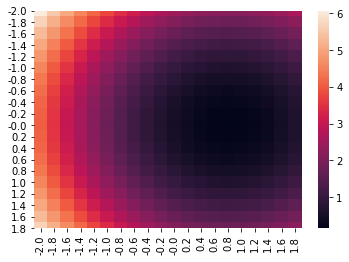

In [29]:
sns.heatmap(cost_all_norm,
           xticklabels = theta1_grid_zoom.round(2),
           yticklabels = theta0_grid_zoom.round(2))


The last thing to do it to extract the parameters associated with the lower cost from the array `cost_all_norm`, as you did before with `cost_all`. Follow the same steps:

- create the variable `best_params_norm` containing a tuple with the indexes corresponding to the best parameter values.
- create the variables `best_theta0_norm` and `best_theta1_norm` containing the values of `theta0` and `theta1` corresponding to the lower cost
- plot the regression line along with the normalized data

In [30]:
# Your code here


In [31]:
best_params_norm = np.unravel_index(cost_all_norm.argmin(), cost_all_norm.shape)

best_theta0_norm = theta0_grid_zoom[best_params_norm[0]]
best_theta1_norm = theta1_grid_zoom[best_params_norm[1]]

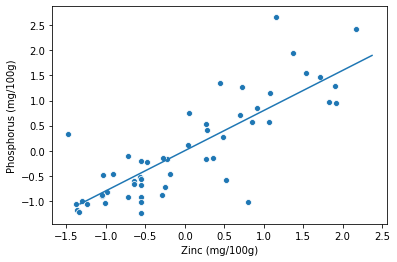

In [32]:
plot_reg_line(data_norm['Zinc (mg/100g)'],
              data_norm['Phosphorus (mg/100g)'],
              theta0=best_theta0_norm,
              theta1=best_theta1_norm)
